In [1]:
dec_hidden_state = [5 , 1 , 20]

<Axes: >

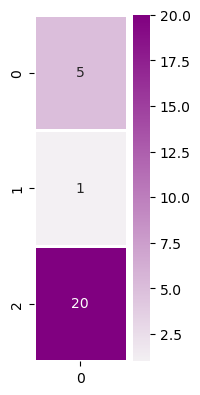

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize our decoder hidden state
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)

In [5]:
annotation = [3,12,45] #e.g. Encoder hidden state

<Axes: >

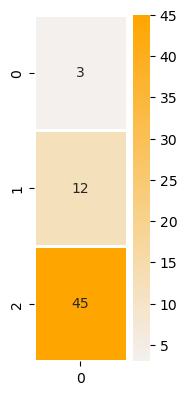

In [7]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [8]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
    # TODO: return the dot product of the two vectors
    return np.asarray(dec_hidden_state).dot(enc_hidden_state)
    
single_dot_attention_score(dec_hidden_state, annotation)

927

In [9]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

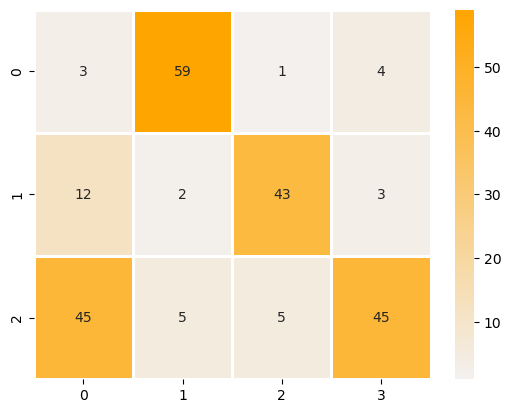

In [11]:
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [15]:
def dot_attention_score(dec_hidden_state, annotations):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return np.asarray(dec_hidden_state).transpose().dot(annotations)
    
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

In [32]:
def softmax(x):
    x = np.array(x, dtype=np.float64) # in fact there should be float 128 but due to some problems on my computer there is no 128 float
    x-=x.max()
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) 

attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 0.00000000e+000, 8.80797078e-001])

In [33]:
def apply_attention_scores(attention_weights, annotations):
    # TODO: Multiple the annotations by their weights
    return np.asanyarray(attention_weights) * np.asanyarray(annotations)[None , :]

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[[3.57608766e-001, 4.68881939e-230, 0.00000000e+000,
         3.52318831e+000],
        [1.43043506e+000, 1.58943030e-231, 0.00000000e+000,
         2.64239123e+000],
        [5.36413149e+000, 3.97357575e-231, 0.00000000e+000,
         3.99001076e+001]]])

In [34]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([[7.15217532e+000, 5.24512000e-230, 0.00000000e+000,
        4.60656872e+001]])

<Axes: >

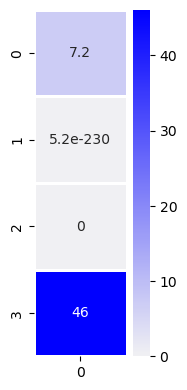

In [35]:
# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)